Australian Used Vehicle prices Prediction

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from matplotlib.ticker import FuncFormatter


In [99]:
#Load csv to dataframe named 'df'
df = pd.read_csv("Australian Vehicle Prices.csv")
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [100]:
df.describe()

,Year
count,16733.000000
mean,2016.229248
std,5.247705
min,1940.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

<span style="font-size:20px;">**Exploratory Data Analysis**</span>


In [102]:
df["FuelConsumption"]

0        8.7 L / 100 km
1        6.7 L / 100 km
2        6.6 L / 100 km
3         11 L / 100 km
4          6 L / 100 km
              ...      
16729                 -
16730                 -
16731    6.2 L / 100 km
16732    7.2 L / 100 km
16733      7 L / 100 km
Name: FuelConsumption, Length: 16734, dtype: object

In [103]:
#Taking a backup
df_copy = df.copy()

In [104]:
df_copy.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [105]:
# Extract the numeric part of the 'FuelConsumption' column and store it in a new column called 'FuelConsumption_Numeric'
df['FuelConsumption_Numeric'] = df['FuelConsumption'].str.split().str[0]

In [106]:
df['FuelConsumption_Numeric']

0        8.7
1        6.7
2        6.6
3         11
4          6
        ... 
16729      -
16730      -
16731    6.2
16732    7.2
16733      7
Name: FuelConsumption_Numeric, Length: 16734, dtype: object

Text(0.5, 1.0, 'Distribution of Car Years')

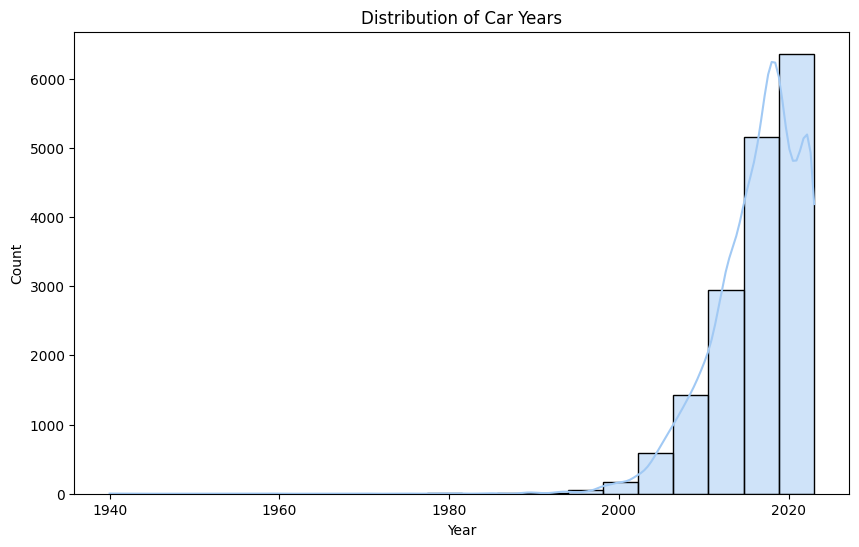

In [107]:
#Histogram of Car Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Distribution of Car Years')


<span style="font-size:20px;">The dataset mostly consists of cars from 2000 and newer.</span>

In [108]:
#Checking number of unique care types
len(df['Car/Suv'].unique())

619

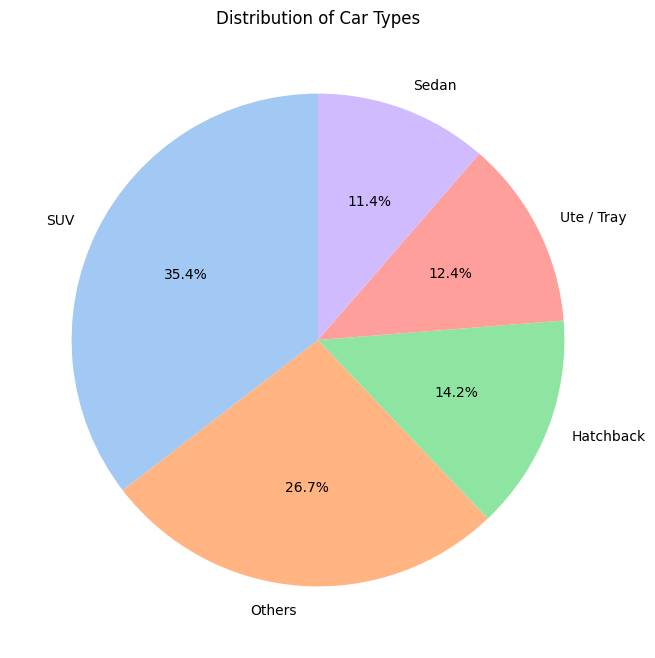

In [109]:
# Example: Pie Chart for Car Types with "Others" category
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")  # Use a pastel color palette for better visualization

# Count the occurrences of each car type in the copied DataFrame
car_type_counts = df_copy['Car/Suv'].value_counts()

# Identify categories with less than 5% occurrences
threshold_percentage = 5.0
categories_to_combine = car_type_counts[car_type_counts / len(df_copy) * 100 < threshold_percentage].index

# Combine categories with less than threshold_percentage into "Others" in the copied DataFrame
df_copy['Car/Suv'] = df_copy['Car/Suv'].apply(lambda x: 'Others' if x in categories_to_combine else x)

# Recalculate counts after combining categories
updated_car_type_counts = df_copy['Car/Suv'].value_counts()

# Create a pie chart based on the copied DataFrame
plt.pie(updated_car_type_counts, labels=updated_car_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Car Types')
plt.show()


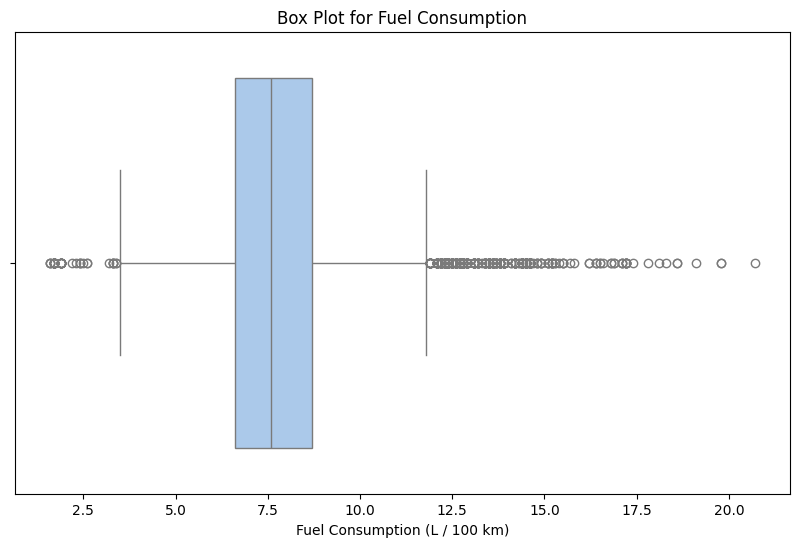

In [110]:
#Checking fuel consumption
df['FuelConsumption'] = pd.to_numeric(df['FuelConsumption'].str.extract(r'(\d+\.\d+)')[0], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='FuelConsumption', data=df)
plt.title('Box Plot for Fuel Consumption')
plt.xlabel('Fuel Consumption (L / 100 km)')
plt.show()

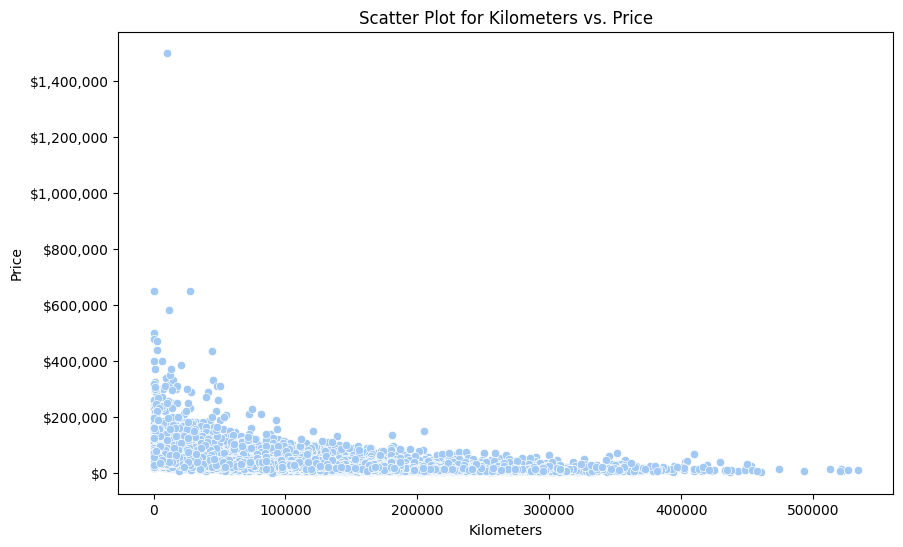

In [111]:
# Convert 'Kilometres' & 'Price' column to numeric, replacing commas with null
# 'coerce' will replace non-numeric values with NaN
df['Kilometres'] = pd.to_numeric(df['Kilometres'].str.replace(',', ''), errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometres', y='Price', data=df)
plt.title('Scatter Plot for Kilometers vs. Price')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Applying format for y-axis to show price in USD
plt.show()

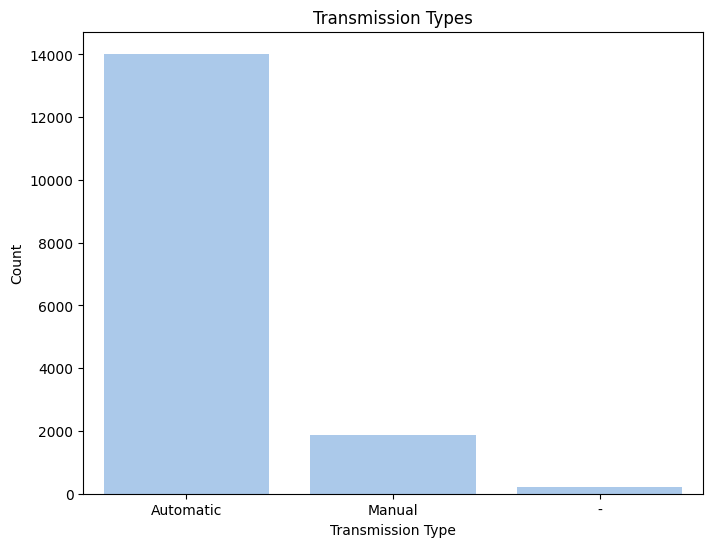

In [117]:
#Bar Chart for Transmission Types

plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

<span style="font-size:20px;">**Linear Regression Analysis**</span>


Mean Squared Error: 757095018.0238492


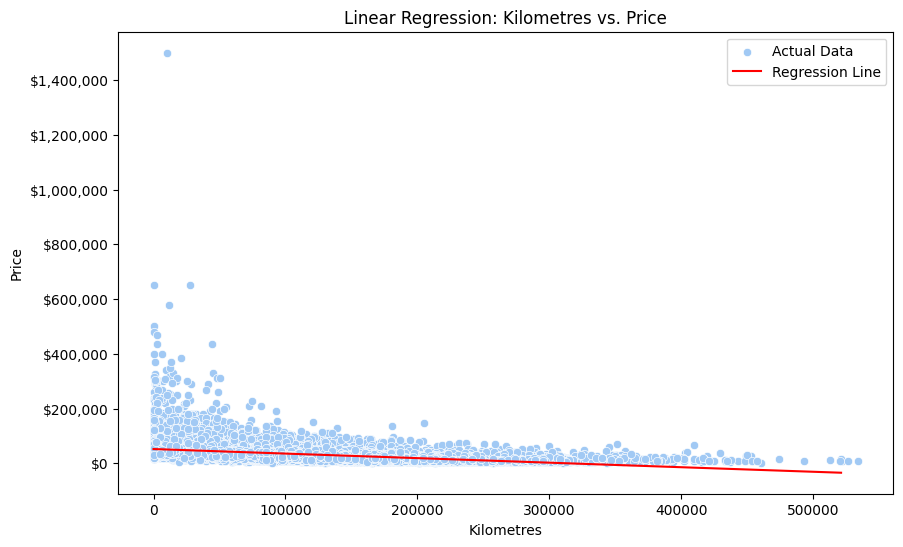

In [113]:
# Dropping rows with missing values in 'Kilometres' and 'Price'
df.dropna(subset=['Kilometres', 'Price'], inplace=True)

# Split the data into training and testing sets
X = df[['Kilometres']]
y = df['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Function to format y-axis labels
def price_formatter(x, pos):
    return f"${x:,.0f}"

# Visualize the regression line with formatted y-axis labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometres', y='Price', data=df, label='Actual Data')
sns.lineplot(x=X_test['Kilometres'], y=y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Kilometres vs. Price')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Apply the formatter
plt.legend()
plt.show()

In [114]:
# Input kilometers for prediction
input_kilometers = pd.DataFrame([[50000]], columns=['Kilometres'])

# Predict the price for a car with the specified kilometers
predicted_price = model.predict(input_kilometers)[0]

# Format the output with underlining and bolding
formatted_input_kilometers = f'\033[4m{input_kilometers.values[0][0]}\033[0m'  # Underline
formatted_predicted_price = f'\033[1m${predicted_price:,.2f}\033[0m'  # Bold

# Print the formatted result
print(f'Predicted Price for a Car with {formatted_input_kilometers} kilometers: {formatted_predicted_price}')


Predicted Price for a Car with 50000 kilometers: $43,810.98


Mean Squared Error: 777172879.8927752


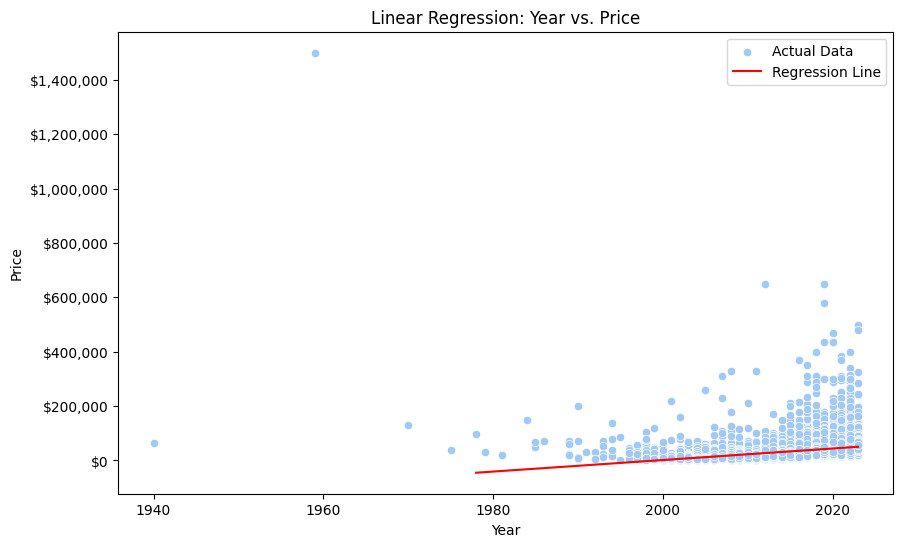

In [115]:
# Drop rows with missing values in 'Year' and 'Price'
df.dropna(subset=['Year', 'Price'], inplace=True)

# Split the data into training and testing sets
X = df[['Year']]  # Feature
y = df['Price']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Function to format y-axis labels
def price_formatter(x, pos):
    return f"${x:,.0f}"

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df, label='Actual Data')
sns.lineplot(x=X_test['Year'], y=y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Apply the formatter
plt.legend()
plt.show()

In [116]:
# Input year for prediction
input_year = pd.DataFrame([[2020]], columns=['Year'])

# Predict the price for a car with the specified year
predicted_price = model.predict(input_year)[0]

# Format the output with underlining and bolding
formatted_input_year = f'\033[4m{input_year.values[0][0]}\033[0m'  # Underline
formatted_predicted_price = f'\033[1m${predicted_price:,.2f}\033[0m'  # Bold

# Print the formatted result
print(f'Predicted Price for a Car with {formatted_input_year} input_year: {formatted_predicted_price}')


Predicted Price for a Car with 2020 input_year: $43,898.95
